🎵 Spotify Listening History Analysis
📌 Overview
This project analyzes personal Spotify listening history data to uncover trends in user behavior, listening habits, and platform usage. Using Python for data cleaning, visualization, and statistical analysis, the notebook explores patterns such as most-used platforms, listening duration, shuffle behavior, and skip rates.

📂 Dataset
Source: Exported from Spotify user activity history.

Key Columns:

spotify_track_uri – Unique track identifier

ts – Timestamp of playback

platform – Platform used (e.g., web player, mobile app)

ms_played – Duration played in milliseconds

track_name – Name of the song

artist_name – Artist

album_name – Album

shuffle – Whether shuffle mode was enabled

skipped – Whether the track was skipped

reason_start / reason_end – Context of playback start and end

🛠 Tools & Libraries
pandas – Data cleaning and transformation

numpy – Numerical operations

matplotlib / seaborn – Static data visualizations

plotly.express – Interactive charts and dashboards

📊 Key Analyses
Platform Usage – Counts and compares total listening sessions across different platforms.

Average Playtime by Shuffle Mode – Examines how shuffle affects average listening duration.

Skip Rate by Shuffle Mode – Determines whether shuffle influences track skipping behavior.

💡 Insights
Certain platforms dominate user listening sessions, indicating preferred devices or access points.

Shuffle mode can influence both listening duration and skip frequency.

These patterns can be applied to playlist curation, personalized recommendations, and user experience improvements.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\AllenMartinezPicazo\Certificates, Portfolio and Projects\Projects\Real Datasets Project\raw data\netflix1.csv')

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Data Cleaning

In [4]:
#Look for a null value
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
df.rename(columns={'date_added': 'Date'}, inplace=True)

Exploratory Data Analysis

In [9]:
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   Date          8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


<Figure size 1200x600 with 0 Axes>

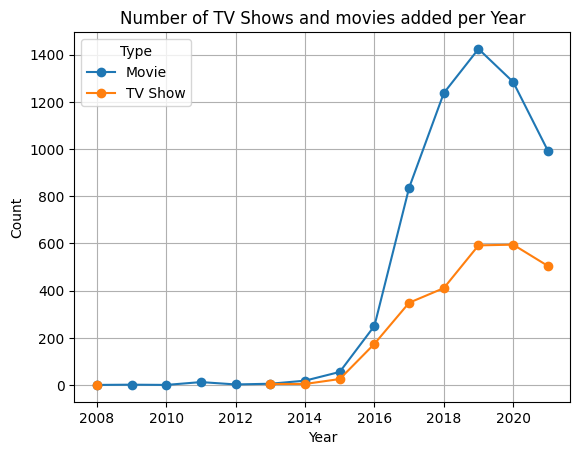

In [10]:
df['year_added']=df['Date'].dt.year
movies_tvshows = df.groupby(['year_added','type']).size().unstack()

plt.figure(figsize=(12,6))
movies_tvshows.plot(kind='line', marker ='o')
plt.title('Number of TV Shows and movies added per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.grid(True)
plt.show()


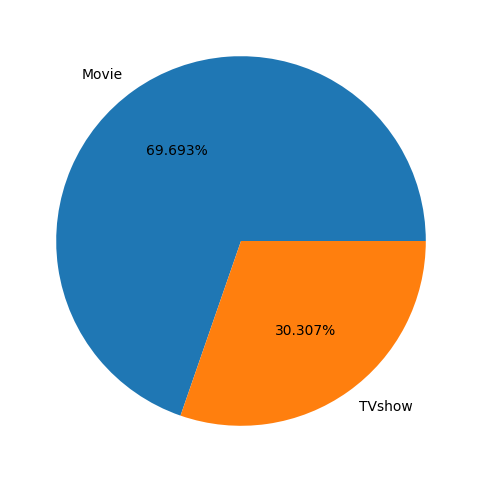

In [11]:
Type_counts = df['type'].value_counts()
Type_counts

plt.figure(figsize=(20,6))
plt.pie(Type_counts,labels=['Movie','TVshow'],autopct='%1.3f%%')
plt.show()

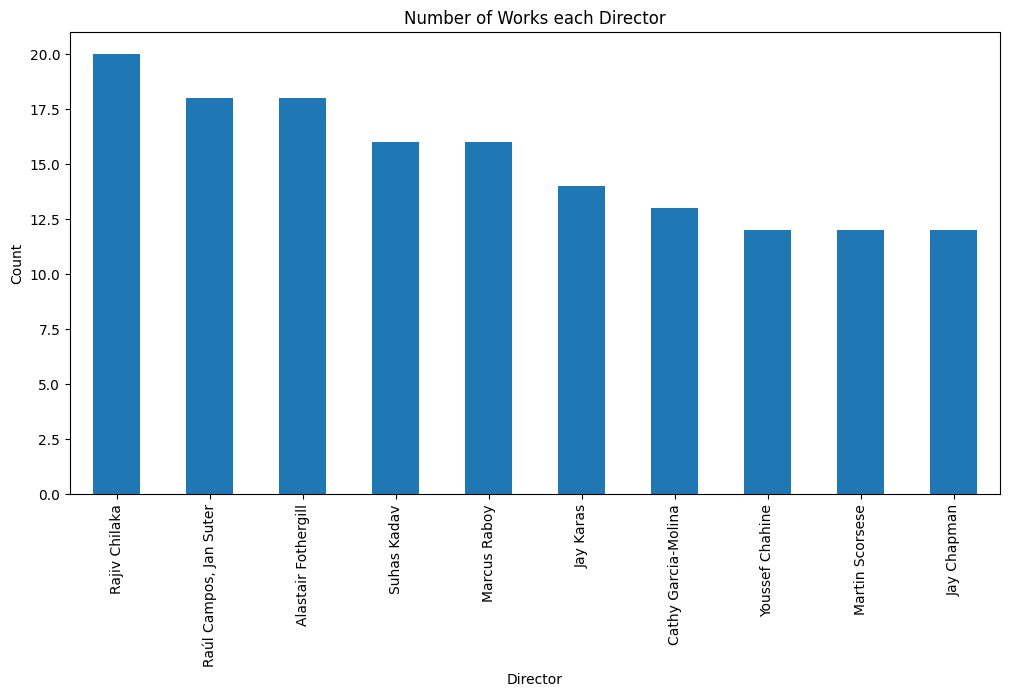

In [12]:
director_filtered = df[df['director'] != 'Not Given']
director_counts= director_filtered['director'].value_counts().head(10)

plt.figure(figsize=(12,6))
director_counts.plot(kind='bar')
plt.title('Number of Works each Director')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

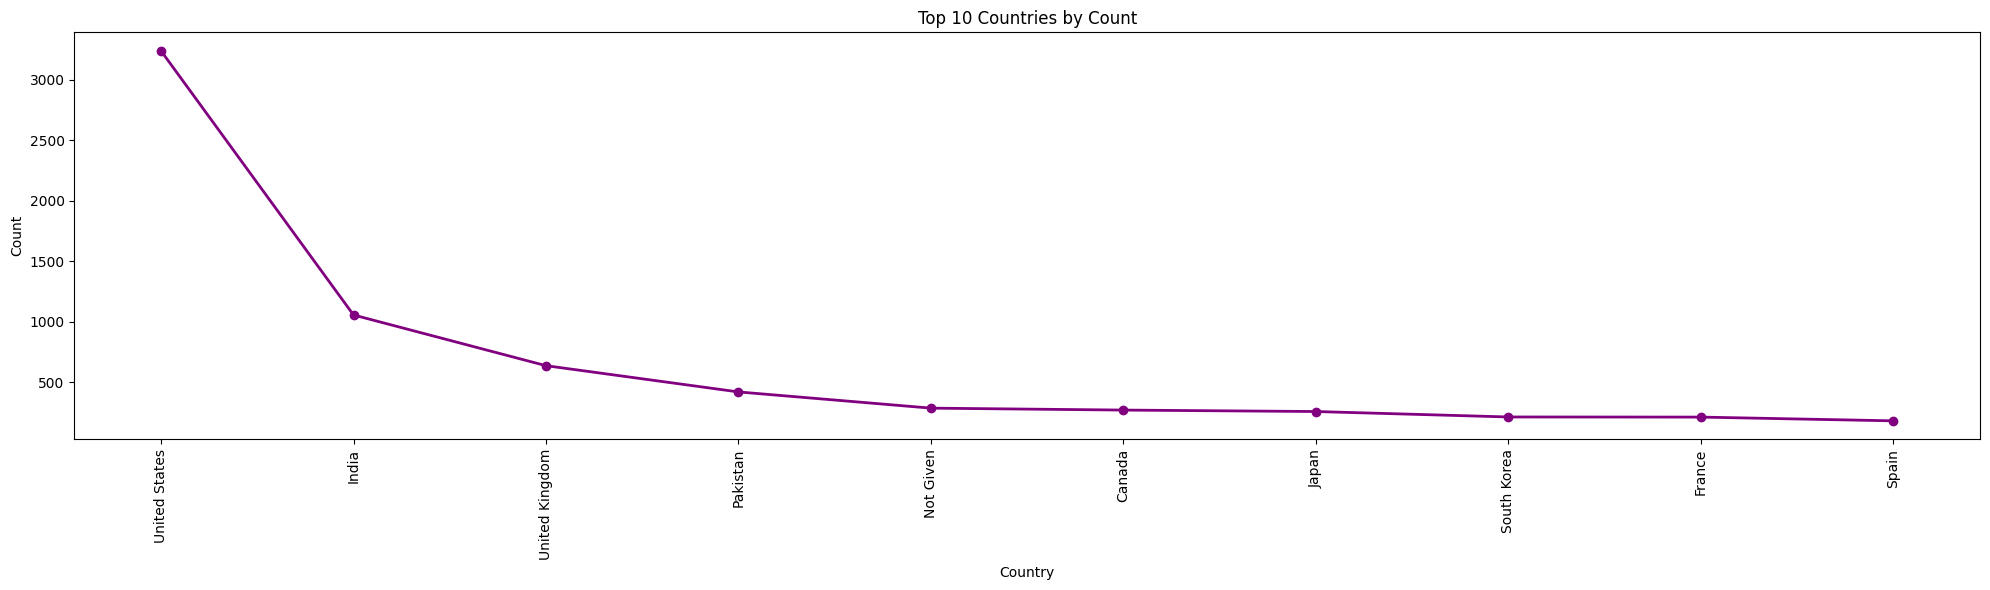

In [13]:
country_counts = df['country'].value_counts().reset_index().sort_values(by='count',ascending=False).head(10)
country_counts

plt.figure(figsize=(20, 6))
plt.plot(country_counts['country'], country_counts['count'], marker='o', color='purple', linestyle='-', linewidth=2)
plt.xticks(rotation=90)
plt.title('Top 10 Countries by Count')
plt.xlabel('Country')
plt.ylabel('Count')
#plt.grid(True)
plt.tight_layout()  
plt.show()

In [14]:
df[['value', 'type']] = df['duration'].str.split(' ', expand=True)
df['value'] = df['value'].astype(int)


Text(0, 0.5, 'Frequency')

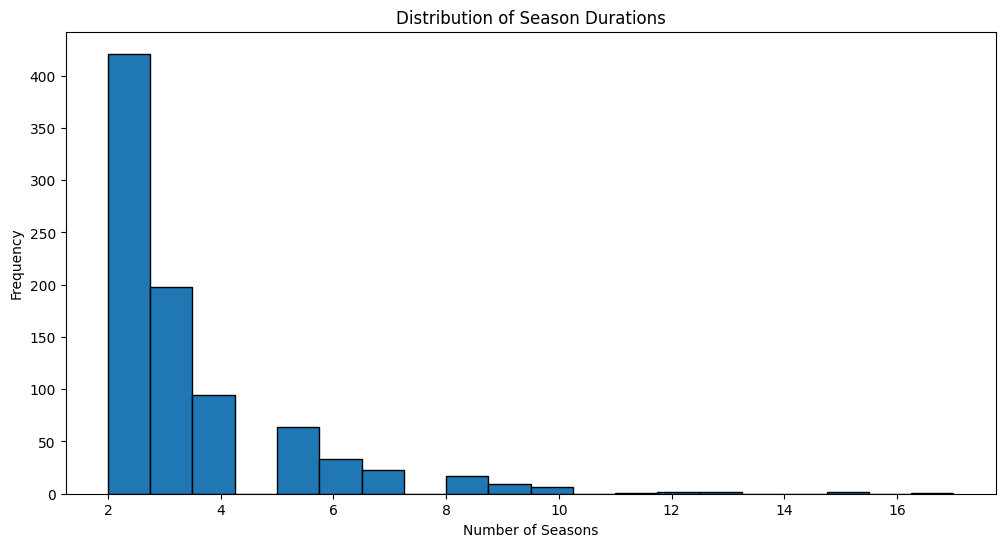

In [15]:
plt.figure(figsize=(12, 6))
plt.hist(df[df['type'] == 'Seasons']['value'], bins=20, edgecolor='black')
plt.title('Distribution of Season Durations')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

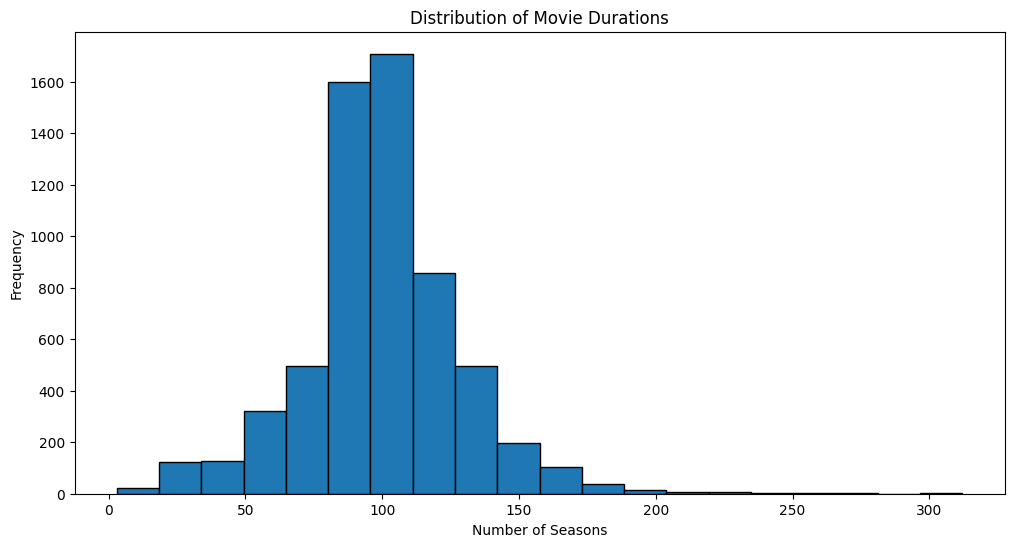

In [16]:
plt.figure(figsize=(12, 6))
plt.hist(df[df['type'] == 'min']['value'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')

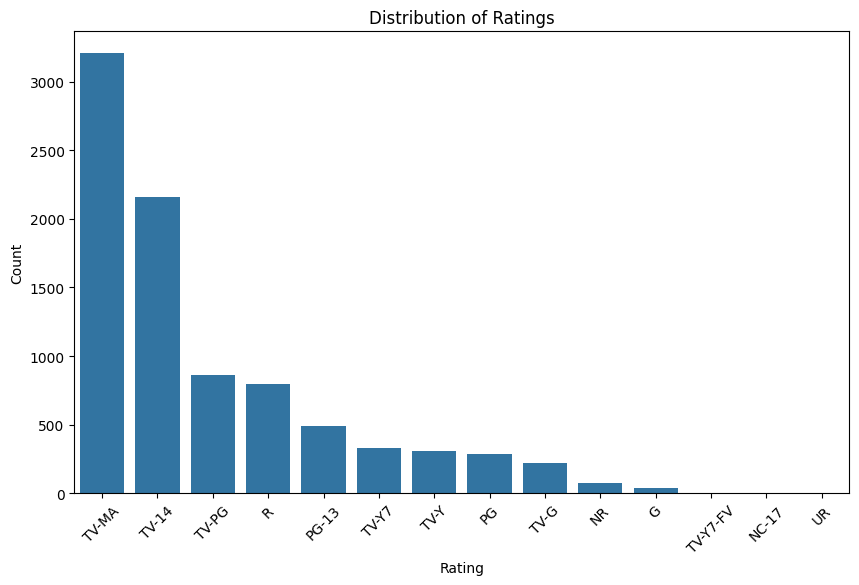

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Conclusion
The Spotify listening history analysis reveals notable patterns in user behavior. The platform usage breakdown shows clear differences in session counts, indicating preferred devices or apps among listeners. Analysis of average playtime by shuffle mode suggests that listening duration varies depending on whether shuffle is enabled, hinting at different engagement patterns. Additionally, skip rate analysis indicates that shuffle settings may influence track skipping frequency, reflecting how listening mode affects user satisfaction with track selection. Overall, these insights can guide content curation, playlist strategies, and user experience improvements.